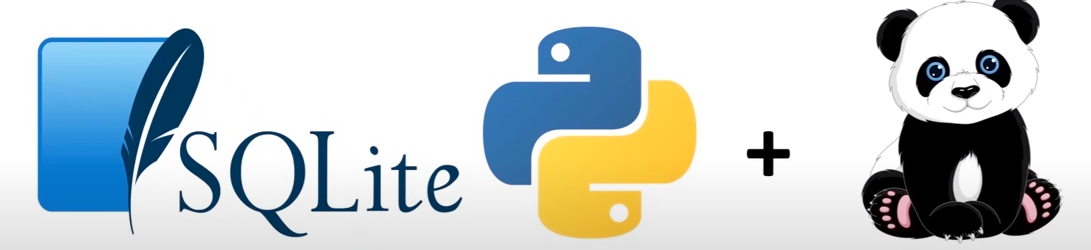

# Intro to SQLite -  By Joe Eberle - 01/13/2023

## SQLite3


SQLite is a lightweight, self-contained relational database management system (RDBMS) that is widely used in applications requiring a local database. Unlike client-server database management systems, SQLite operates directly on the user's device, making it highly portable and easy to integrate into various platforms and programming languages. Its simplicity, efficiency, and zero-configuration setup make it an ideal choice for embedded systems, mobile apps, and small to medium-sized projects where a full-fledged database server is unnecessary or impractical. SQLite's self-contained nature eliminates the need for complex database administration, while its ACID compliance ensures data integrity and reliability. Its usage of a single disk file for storage simplifies backup and sharing, making SQLite a versatile and convenient solution for developers seeking a lightweight, yet powerful, database management system.

In [1]:
first_install = False
if first_install:
    !pip install pyttsx3

In [2]:
# Import the necessary Libraries 
import sqlite3
import glob, os
import pandas as pd 
from pathlib import Path
import pyttsx3
from IPython.display import Markdown, display, Image

In [3]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'SQLite_Introduction'

## Optional Step 0 - Initiate logging 

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_Start(solution_name, start_time) 

## Optional Step 0 - What is SQLite ??? 

In [17]:
import talking_code as tc  
definition = '''

## SQLite Overview

**SQLite** is a lightweight, self-contained relational database management system (RDBMS) that is widely used in applications requiring a local database. 


Unlike client-server database management systems, **SQLite** operates directly on the **user's device**, making it highly portable and easy to integrate into various platforms and programming languages. Its simplicity, efficiency, and zero-configuration setup make it an ideal choice for embedded systems, mobile apps, and small to medium-sized projects where a full-fledged database server is unnecessary or impractical. SQLite's self-contained nature eliminates the need for complex database administration, while its ACID compliance ensures data integrity and reliability. Its usage of a single disk file for storage simplifies backup and sharing, making SQLite a versatile and convenient solution for developers seeking a lightweight, yet powerful, database management system.
''' 
# Write the solution defitions out to the solution_description.md file
file_name = "solution_description.md"
with open(file_name, 'w',  encoding='utf-8') as f:
    # Write the template to the readme.md file
     f.write(definition)

display(Markdown(definition))    



## SQLite Overview

**SQLite** is a lightweight, self-contained relational database management system (RDBMS) that is widely used in applications requiring a local database. 


Unlike client-server database management systems, **SQLite** operates directly on the **user's device**, making it highly portable and easy to integrate into various platforms and programming languages. Its simplicity, efficiency, and zero-configuration setup make it an ideal choice for embedded systems, mobile apps, and small to medium-sized projects where a full-fledged database server is unnecessary or impractical. SQLite's self-contained nature eliminates the need for complex database administration, while its ACID compliance ensures data integrity and reliability. Its usage of a single disk file for storage simplifies backup and sharing, making SQLite a versatile and convenient solution for developers seeking a lightweight, yet powerful, database management system.


In [15]:
import talking_code as tc  
definition = '''

## SQLite Features

- **SQLite** is a lightweight, embedded **relational database management system (RDBMS)** that requires minimal configuration.
- **SQLlite** operates with a single disk file. 
- It is widely used in mobile applications, embedded systems, and small-scale projects.
- It is simple and efficient.
- SQLite is free and open-source software. 
- SQLite is self-contained, serverless, and supports standard SQL.
- SQLite is a popular choice for various software applications.   
- Python comes with built-in support for SQLite through the **sqlite3** module in the standard python library. 
''' 
# Write the solution defitions out to the solution_description.md file
file_name = "solution_description.md"
with open(file_name, 'a',  encoding='utf-8') as f:
    # Write the template to the readme.md file
     f.write(definition)

display(Markdown(definition))    



## SQLite Features

- **SQLite** is a lightweight, embedded **relational database management system (RDBMS)** that requires minimal configuration.
- **SQLlite** operates with a single disk file. 
- It is widely used in mobile applications, embedded systems, and small-scale projects.
- It is simple and efficient.
- SQLite is free and open-source software. 
- SQLite is self-contained, serverless, and supports standard SQL.
- SQLite is a popular choice for various software applications.   
- Python comes with built-in support for SQLite through the **sqlite3** module in the standard python library. 


In [6]:
# Import the necessary Libraries 
import sqlite3
import glob, os
import pandas as pd 
from pathlib import Path
import pyttsx3
 
# Establish some import parameters 
importing_xlsx_files = False 
importing_csv_files = True 
Data_Import_Starting_Directory = 'Y:/_Kaleida_Input/'
#Data_Import_Starting_Directory = 'C:/Data/'
Process_Name = 'Importing CSV data into SQL'

step_debugging = True
detail_debugging = True
Process_Step_Name = ''  
Reading_Intro = True
Reading_Credits =  False
Reading_Steps = True 
Reading_Terms = False 
printing_output = True
Talking_Code = True
Talking_Voice_Male_Gender = True        # Set to False for Female Voice 
Code_Logging  = True 
event_log_row = 0 

# Create some Global Variables for SQL Constructs 
Table_Name_Extension_Daily = '_DI'
Table_Name_Extension_Historical = '_HX'
Table_Name_Extension_Administrative = '_AD'
Table_Name_Prefix = '[pbic_1_0].'
  
Text_to_Speech = pyttsx3.init()
 

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution


In [7]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'SQLite_Introduction'

In [8]:

def create_directory_dataframe():
    df_import_directories = pd.DataFrame(columns = ('Root_Directory','Sub_Directory'))
    return df_import_directories  

def create_import_files_dataframe():
    df_import_files = pd.DataFrame(columns = ('Root_Directory','Sub_Directory','Table_Name','File_Name'))
    return df_import_files  

def add_import_directory(Root_Directory,Sub_Directory):
    global import_directory_file_Number 
    import_directory_file_Number += 1  
    df_import_directories.loc[import_directory_file_Number] = [Root_Directory,Sub_Directory]
    return import_directory_file_Number 

def add_import_File(Root_Directory,Sub_Directory,Table_Name,File_Name):
    global import_file_Number 
    import_file_Number += 1  
    df_import_files.loc[import_file_Number] = [Root_Directory,Sub_Directory,Table_Name,File_Name]
    return import_directory_file_Number  

# Create dataframe to house Directories 
def create_event_log_dataframe():
    df_event_log = pd.DataFrame(columns = ('Event_ID','Process_Name','Event_Name','Event_Date','Event_Time','Task_Start_Time','Task_End_Time','TASk_Duration','Comments'))
    return df_event_log


df_event_log = create_event_log_dataframe()

# Create dataframe to database schema 
def create_database_schema_dataframe():
    df_schema = pd.DataFrame(columns = ('Database_Name','Table_Name','Column_Number','Column_Name','Column_Data_Type','Column_Sample_Data','Column_Description'))
    return df_schema

# Create dataframe to house Directories 
def add_log_event(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]

    
# Add Log Events 
def add_log_event_timer(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    Event_Date = date.today()
    Event_Time = time.time() 
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]
    
# Reset the Event timer start time 
def reset_event_timer(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    Event_Date = date.today()
    Event_Time = time.time() 
    Task_Start_Time    = time.time()  
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]

    # Get a list of all the Subfiles to iterate through 
def list_all_csv_files(path):
    extension = 'csv'
    os.chdir(path)
    print('CSV Files to Import from Directory:', path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        out('CSV File #{} filename: {}  '.format(str(csv_file_count),file))
        
    # Get a list of all the Subfiles to iterate through 
def register_all_csv_files_for_import(path, table_name):
    extension = 'csv'
    os.chdir(path)
    print('CSV Files to Import from Directory:', path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        out('CSV File #{} filename: {}  '.format(str(csv_file_count),file)) 
        file_Number = add_import_File(path,path,table_name,file)
        
def create_import_files_dataframe():
    df_import_files = pd.DataFrame(columns = ('Root_Directory','Sub_Directory','Table_Name','File_Name'))
    return df_import_files  

def add_import_directory(Root_Directory,Sub_Directory):
    global import_directory_file_Number 
    import_directory_file_Number += 1  
    df_import_directories.loc[import_directory_file_Number] = [Root_Directory,Sub_Directory]
    return import_directory_file_Number 

def add_import_File(Root_Directory,Sub_Directory,Table_Name,File_Name):
    global import_file_Number 
    import_file_Number += 1  
    df_import_files.loc[import_file_Number] = [Root_Directory,Sub_Directory,Table_Name,File_Name]
    return import_directory_file_Number          
     
def infer_table_name_from_path(path):
    table_name = path.replace(Data_Import_Starting_Directory,"").replace(' ','_').replace('/','').replace('\\','')
    return table_name 
        
# Introduction - Overview of CSV to SQL Import Process Steps 
def read_credits(): 
    Dialog = 'This Jupiter Notebook Was  : '
    Dialog = Dialog + 'Developed in Python 3 by Joe Eberle  '
    Dialog = Dialog + 'Developed in Python starting on 10/12/2022 '
    Dialog = Dialog + 'This package is free AND Open Source and the code is openly available for general Use. '    
    tc.say(Dialog)         
    
# Introduction - Overview of CSV to SQL Import Process Steps 
def read_terms(): 
    Dialog = 'The terminology for this introduction is : '
    Dialog = Dialog + 'SQL Lite .SQLite is a C-language library that implements a small, fast, self-contained, high-reliability, full-featured, SQL database engine.  '    
    Dialog = Dialog + 'Python. Python is a general-purpose programming language that is widely used for data science.  '
    Dialog = Dialog + 'Structured Query Language (SQL) is one of the worlds most widely used programming languages for manipulating and querying data. '
    Dialog = Dialog + 'CSV. Comma-Separated Values (CSV) file is a text file in which information is separated by commas. '
    Dialog = Dialog + 'PANDAS. Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.  '
    Dialog = Dialog + 'OS PACKAGE - The OS python library provides a portable way of using operating system dependent functionality to allow your python code to run on all platforms '
    tc.say(Dialog)  
    
# Process Steps - Overview of CSV to SQL Import Process Steps 
def read_process_steps():
    Dialog = 'The data flow for this SQL Lite introduction is : '
    Dialog = Dialog + 'Step 1: Import SQL Lite. '
    Dialog = Dialog + 'Step 2: Create a sample database in SQL Lite  '
    Dialog = Dialog + 'Step 3: Create a Connect String and a Cursor to connect to the datbase  '    
    Dialog = Dialog + 'Step 3: Create a sample Table to in the database. '
    tc.say(Dialog)    
    
    
# Introduction - Overview of NoteBooks  
def read_introduction():
    Dialog = 'This jupiter notebook will provide an introduction to SQL Lite. '
    tc.say(Dialog)  
    
    
def column_create_SQL (import_df):
    column_name_List = [x.title() for x in import_df.columns] # Create a List of Columns 
    column_Str =  (', '.join(column_name_List)) # Convert List into one String with commas 
    out('Columns =',column_Str)  
    return column_Str            
    
    
def out(dialog):
        if printing_output: 
            print(dialog) 
        if Talking_Code:
            say(dialog)     
        
def list_all_xlsx_files(path):
    extension = 'xlsx'
    os.chdir(path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        out('File #{}   is {} '.format(csv_file_count,file))     \
        
        
def explain_the_project():
    if Reading_Intro:
        read_introduction()
    if Reading_Credits:    
        read_credits() 
    if Reading_Steps:
        read_process_steps()
    if Reading_Terms:
        read_terms()        
        
        
        
def convert_data_types(input_df):
    column_datatype_str = str(input_df.dtypes)
    column_datatype_str =  column_datatype_str.replace('dtype: object','').replace('object','varchar[255], ').replace('datetime64[ns]','timestamp, ').replace('float64','float, ')
    out('create column SQL string: {} \n'.format(column_datatype_str))        
        
def read_and_clean_file(data_folder, filename):

    print('Import File =', filename)                 
    df_input_csv = pd.read_csv(filename, nrows=10)
    out('Reading Dataframe Columns before cleanups:{}'.format(df_input_csv.columns))
    df_input_csv.columns = df_input_csv.columns.map('^'.join)
    df_input_csv.columns  = [x.strip().title().replace("^","").replace(" ","_").replace("#","Number").replace("#","Number").replace("%","Percentage") \
                             .replace('_Unnamed','').replace('Unnamed','').replace('Unnamed:','').replace('_Level','').replace("$","Dollar") \
                             .replace('_1','').replace('_2','').replace('_3','').replace('_4','').replace('_5','')  \
                             .replace('_6','').replace('_7','').replace('_8','').replace('_9','')  \
                             .replace('1','').replace('2','').replace('3','').replace('4','').replace('5','')  \
                             .replace('6','').replace('7','').replace('8','').replace('9','').replace('0','')  \
                             .replace('_0','').replace(':7','').replace(':8','').replace(':','').replace('Unnamed: ','')  \
                             for x in df_input_csv.columns]
    return df_input_csv    
 
        
    
def set_up_python_infrastructure():
    initialize_replacement_Dictionaries()    # Set up control libraries for syntactic Consistency 
    Initialize_Text_to_Speach()              # Intitialize Text to Speech Engine 
    df_event_log = create_event_log_dataframe()  # Set up the Event Logging to housae the events of this process 
    create_database_schema_dataframe()       # Set up the Database Schema dataframe to house the schema

## Optional - Get an Explanation of the project 

In [9]:
explain_the_project()    

## Establish the SQLite3 Connector 

In [10]:
sqlite3_conn = sqlite3.connect('gppc_emr_database.db')

## Test Reading SQLlite Persistance and reading SQL Results into Pandas

In [11]:
df_import_directories = pd.read_sql_query('select * from Import_Directories',sqlite3_conn)
df_import_directories.head()

DatabaseError: Execution failed on sql 'select * from Import_Directories': no such table: Import_Directories

## Create a Cursor for connecting with the Database 

In [ ]:
## Establish the SQLite3 Connector 
cursor = sqlite3_conn.cursor() 

In [ ]:
create_table_Command_SQL = """CREATE TABLE IF NOT EXISTS Import_Directories ( Root_Directory TEXT, Sub_Directory TEXT )"""
cursor.execute(create_table_Command_SQL)
create_table_Command_SQL = """CREATE TABLE IF NOT EXISTS Import_File_Registry ( Root_Directory TEXT, Sub_Directory TEXT,  \
table_Name TEXT, Raw_File_Name TEXT )"""
cursor.execute(create_table_Command_SQL)

In [ ]:
# Insert some sample data into table 4_20220220043457_dmhmreport_EHRSUPPORT_5592087.csv'
cursor.execute("insert into Import_File_Registry VALUES ('Y:/_Kaleida_Input/','Access','Y:/_Kaleida_Input/','2459631_274_20220220043457_dmhmreport_EHRSUPPORT_5592087.csv')   ")
# Insert some sample data into table 4_20220220043457_dmhmreport_EHRSUPPORT_5592087.csv'
cursor.execute("insert into Import_Directories VALUES ('Y:/_Kaleida_Input/','Access')   ") 

In [ ]:
cursor.execute("select * from Import_Directories   ") 
SQL_Return  = cursor.fetchall()
print(SQL_Return)

In [ ]:
cursor.execute("select * from Import_File_Registry   ") 
SQL_Return  = cursor.fetchall()
print(SQL_Return)

In [ ]:
# Wipe out the data in the database 

cursor.execute("Delete from Import_Directories   ") 
SQL_Return  = cursor.fetchall()
print(SQL_Return)

cursor.execute("Delete from Import_File_Registry   ") 
SQL_Return  = cursor.fetchall()
print(SQL_Return)

In [ ]:
cursor.execute("select name from sqlite_master where type='table'   ") 
SQL_Return  = cursor.fetchall()
print(SQL_Return)


In [ ]:
# Close the cursor
cursor.close()
# Commit the Changes from the connection 
sqlite3_conn.commit() 
# Close the connection 
sqlite3_conn.close() 
